In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('huntstone')
import scipy.constants as const
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline as spl, interp1d
import sys
sys.path.insert(0, "/home/keenan/WARGSim")
from beams import electronbeam
#path = ("/media/keenan/Data_Storage/WARGSim/Dump")
path = ("/home/keenan/Dumps/")
import v_x_interp as interp
import spectral_intensity as si
def makefig():
    fig = plt.figure(figsize = (4, 3), dpi = 200)
    ax  = fig.gca()
    return fig, ax
me      = const.physical_constants['electron mass energy equivalent in MeV'][0]*(1e6)
beamE   = 10e9 # beam energy in eV
gb0     = beamE/me # reltivistic Lorentz factor (centroid value)

In [2]:
x_init = np.load("x_init.npy")
y_init = np.load("y_init.npy")

In [3]:
# Compute plasma parameters and transverse oscillation frequency
ni    = 0.34e17 # plasma density (per cc)
ni_m  = ni * 1e6 # plasma density in m^-3 
e     = const.e # Electron charge C
m_e   = const.m_e # Electron mass kg
eps0  = const.epsilon_0
wpe   = np.sqrt(ni_m * e**2 / (eps0 * m_e))
ws    = wpe / np.sqrt(gb0)

In [4]:
# Compute time, spatial, and velocity arrays
L_plasma = 0.4 # m
t_prop   = L_plasma / const.c
N        = 100
t_arr    = np.linspace(0, t_prop, N)

x0_arr    = np.zeros((len(t_arr))) + const.c * t_arr
x1_arr    = np.zeros((len(x_init), len(t_arr)))
x2_arr    = np.zeros((len(y_init), len(t_arr)))
x3_arr    = np.zeros(len(t_arr)) + const.c * t_arr;

v0_arr = np.zeros(len(t_arr)) + gb0 * const.c
v1_arr   = np.zeros((len(x_init), len(t_arr)))
v2_arr   = np.zeros((len(y_init), len(t_arr)))
v3_arr   = np.zeros((len(t_arr))) + const.c
for i in range(len(t_arr)):
    x1_arr[:, i] = x_init * np.cos(ws * t_arr[i])
    x2_arr[:, i] = x_init * np.cos(ws * t_arr[i])
    
    v1_arr[:, i] = -x_init * ws * np.sin(ws * t_arr[i])
    v2_arr[:, i] = -y_init * ws * np.sin(ws * t_arr[i])

In [5]:
tau_arr = t_arr / gb0 # proper time array
tau_int = np.linspace(tau_arr[0], tau_arr[-1], 1000) # interpolation array
# Get 4-velocity components gamma * (c, v)
v1_arr = gb0 * v1_arr
v2_arr = gb0 * v2_arr
v3_arr = gb0 * v3_arr

In [11]:
x_arr = (x0_arr, x1_arr[0,:], x2_arr[0,:], x3_arr)
v_arr = (v0_arr, v1_arr[0,:], v2_arr[0,:], v3_arr)

In [13]:
x1n, x2n, v1n, x_int, v_int = si.get_coeffs(x_arr, v_arr, tau_arr, tau_int)

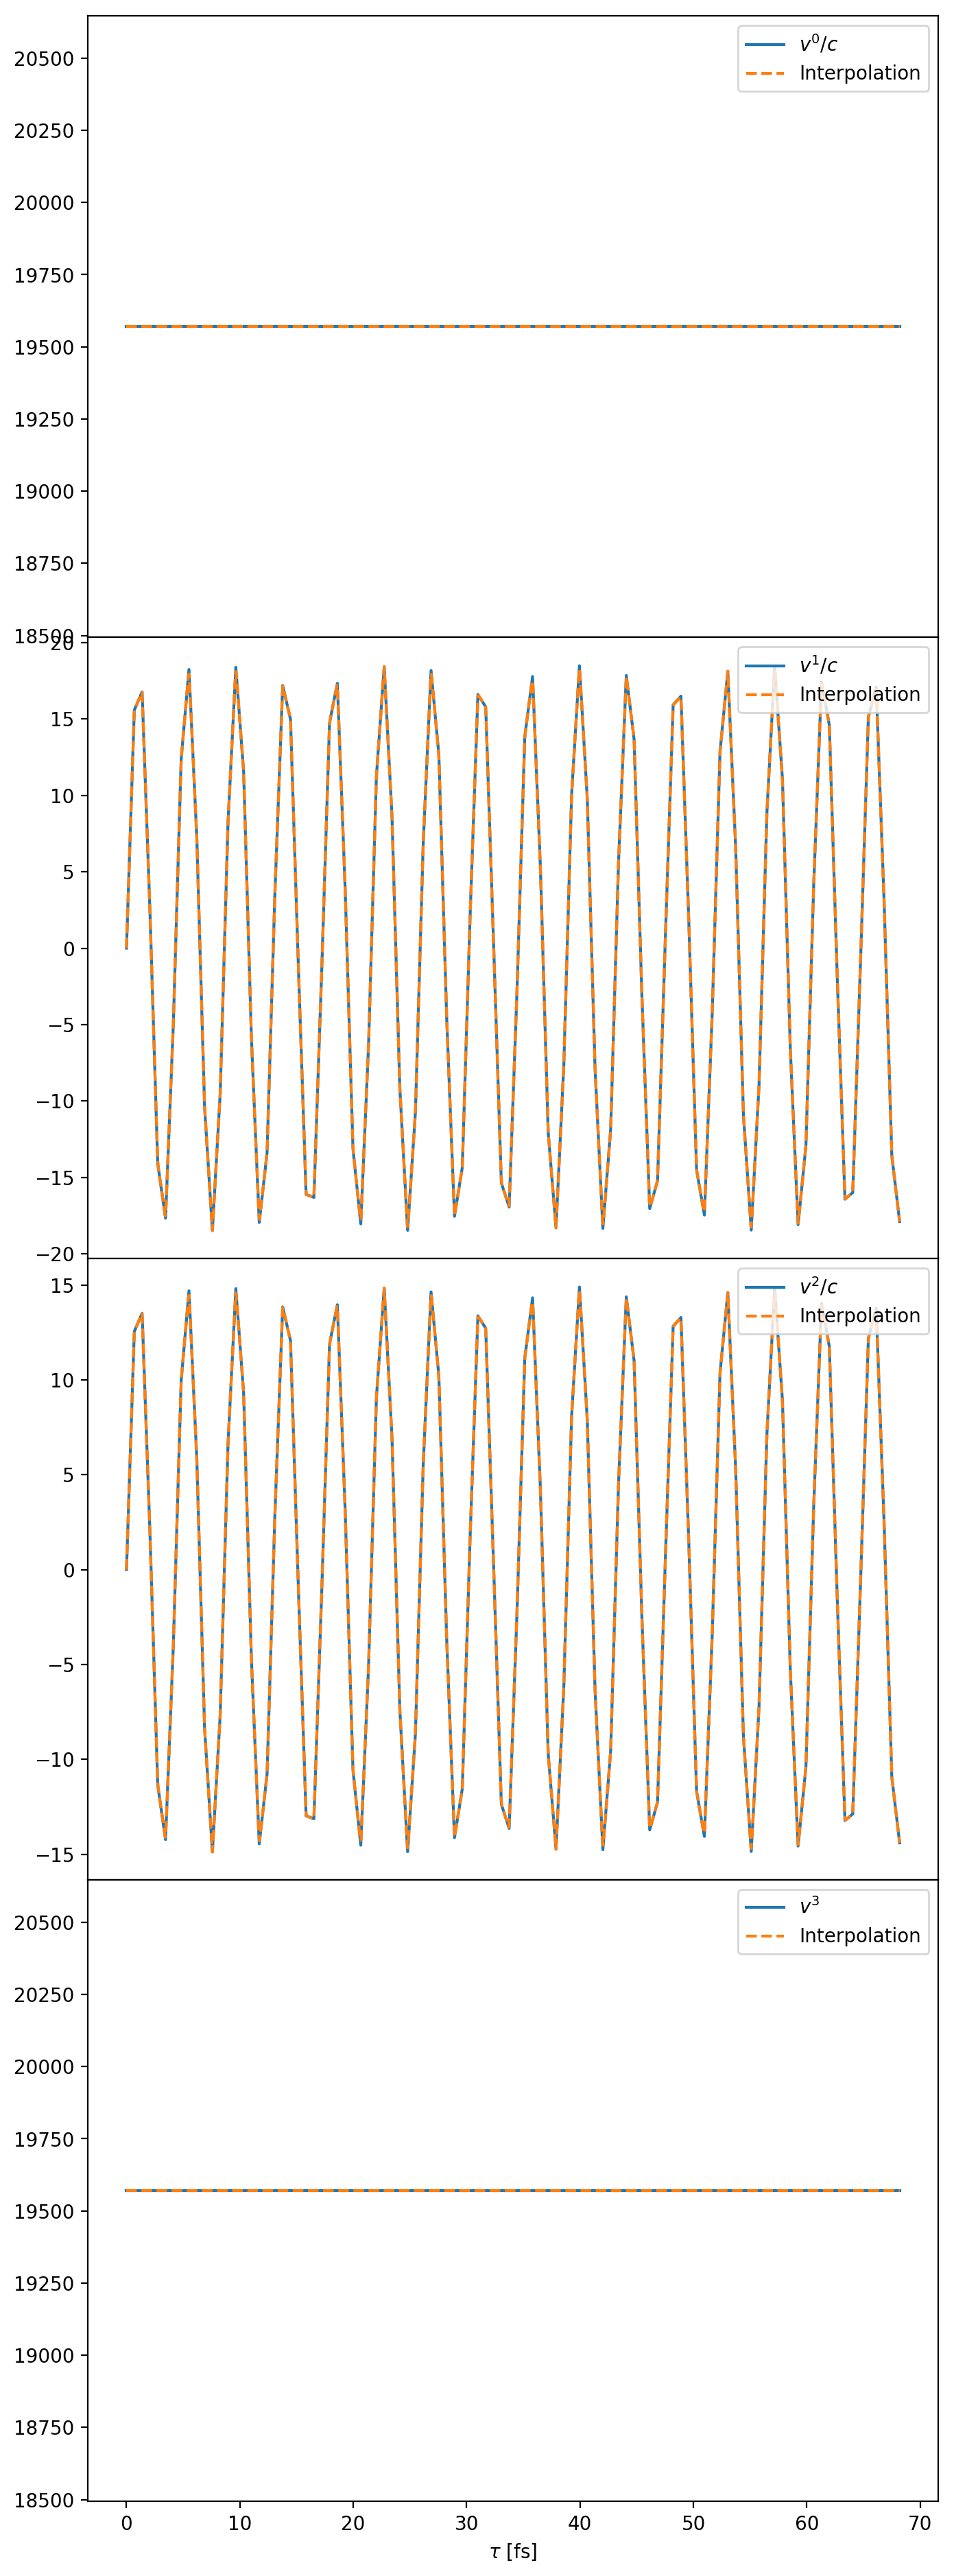

In [14]:
# Plot all velocity
if True:
    fig = plt.figure(figsize = (8, 24), dpi = 200)
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    ax1.plot(tau_arr * 1e15, v_arr[0] / const.c, label = r'$v^0 /c$')
    ax1.plot(tau_int * 1e15, v_int[0] / const.c, '--', label = 'Interpolation')
    ax2.plot(tau_arr * 1e15, v_arr[1] / const.c, label = r'$v^1 / c$')
    ax2.plot(tau_int * 1e15, v_int[1] / const.c, '--', label = 'Interpolation')
    ax3.plot(tau_arr * 1e15, v_arr[2] / const.c, label = r'$v^2 / c$')
    ax3.plot(tau_int * 1e15, v_int[2] / const.c, '--', label = 'Interpolation')
    ax4.plot(tau_arr * 1e15, v_arr[3] / const.c, label = r'$v^3$')
    ax4.plot(tau_int * 1e15, v_int[3] / const.c, '--', label = 'Interpolation')


    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel(r'$\tau$ [fs]')
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    ax3.legend(loc = 'upper right')
    ax4.legend(loc = 'upper right')
    plt.subplots_adjust(hspace = 0)
    plt.show()

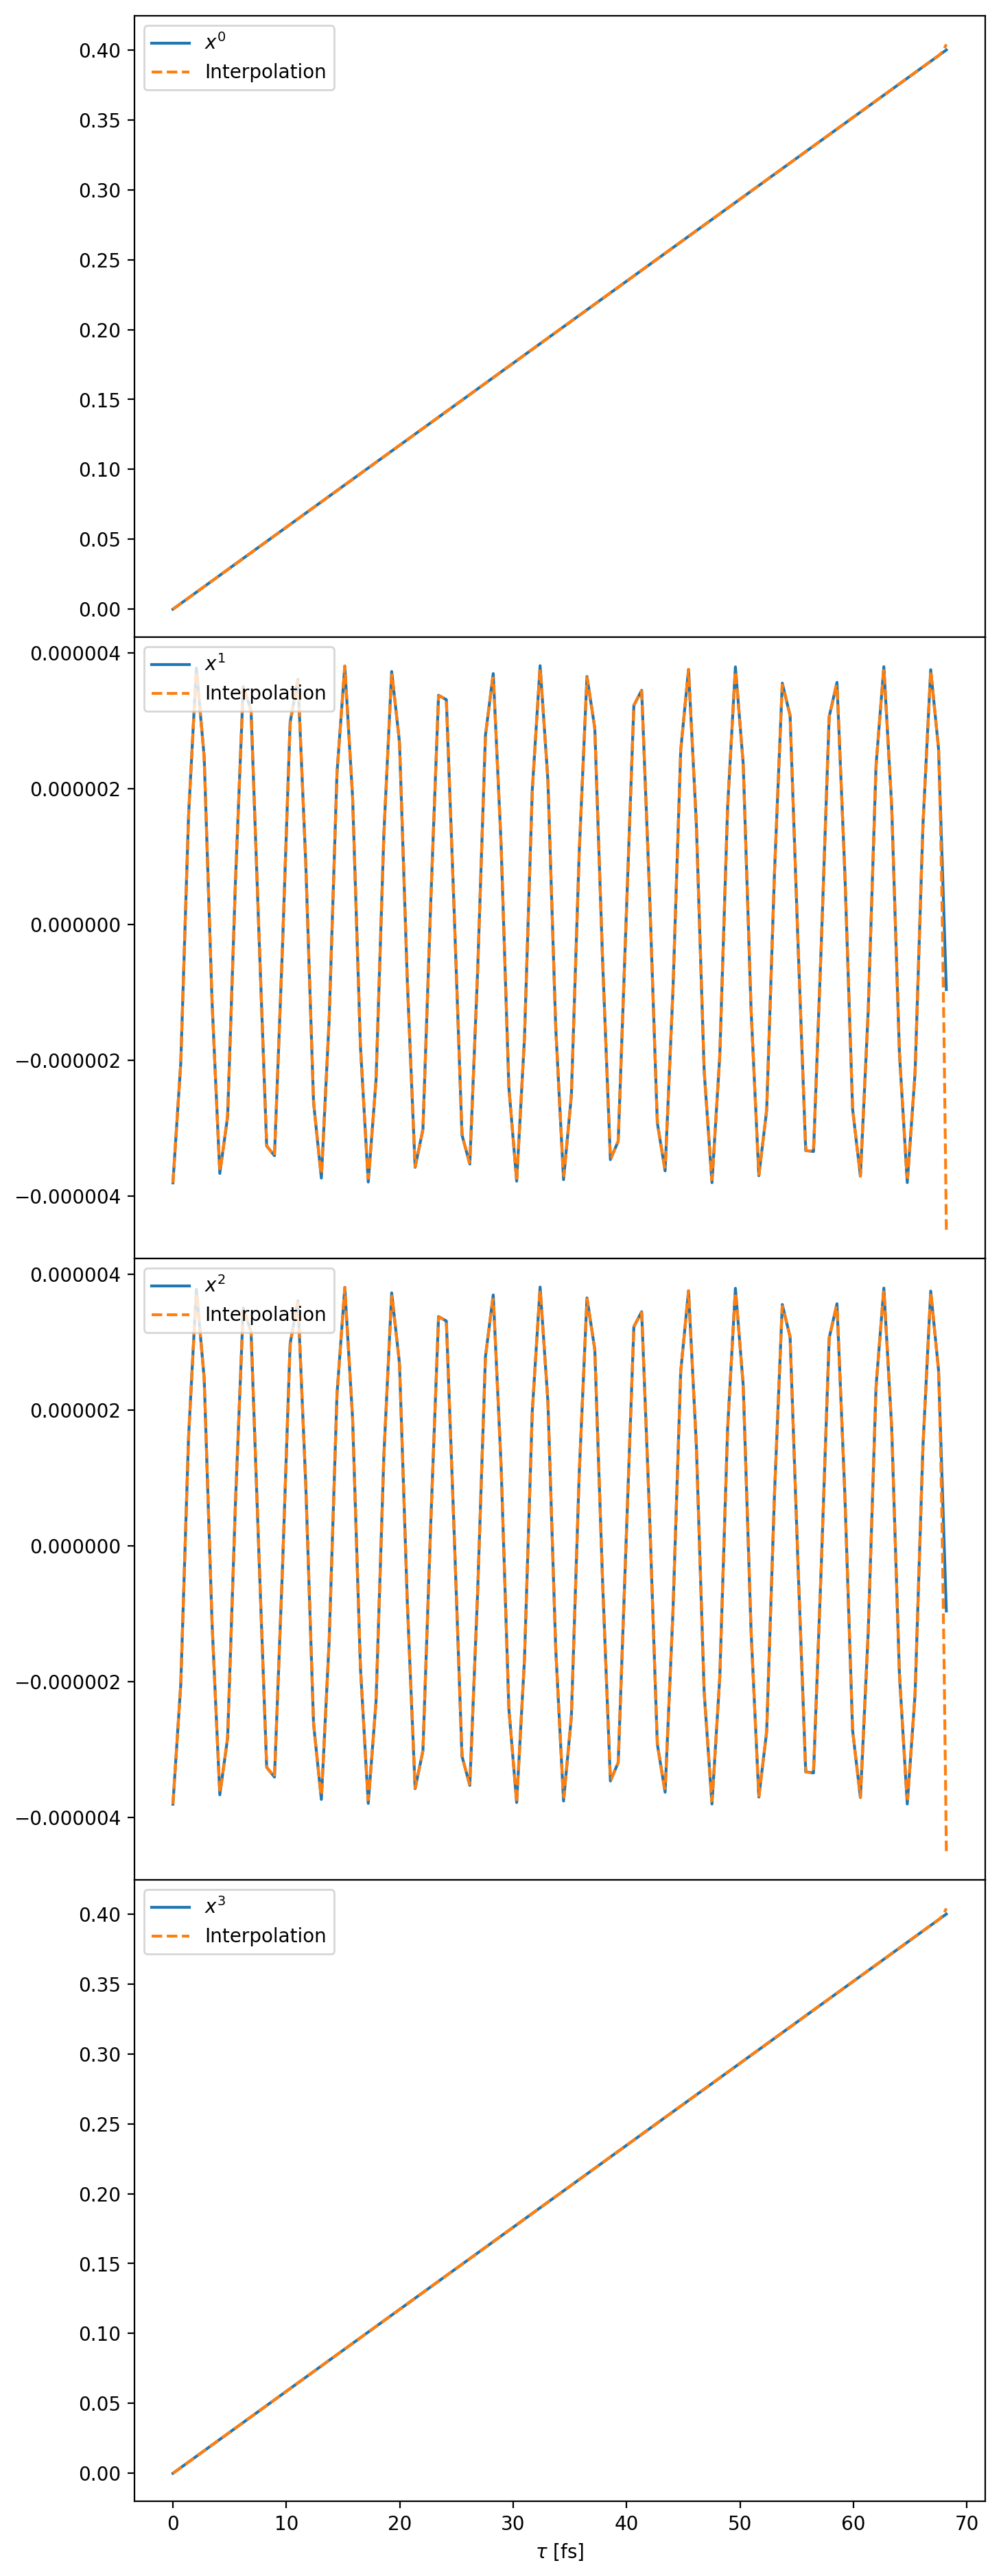

In [16]:
# Plot all  positions
if True:
    fig = plt.figure(figsize = (8, 24), dpi = 200)
    ax1 = fig.add_subplot(411)
    ax2 = fig.add_subplot(412)
    ax3 = fig.add_subplot(413)
    ax4 = fig.add_subplot(414)
    
    ax1.plot(tau_arr * 1e15, x_arr[0], label = r'$x^0$')
    ax1.plot(tau_int * 1e15, x_int[0], '--', label = 'Interpolation')
    
    ax2.plot(tau_arr * 1e15, x_arr[1], label = r'$x^1$')
    ax2.plot(tau_int * 1e15, x_int[1], '--', label = 'Interpolation')
        
    ax3.plot(tau_arr * 1e15, x_arr[2], label = r'$x^2$')
    ax3.plot(tau_int * 1e15, x_int[2], '--', label = 'Interpolation')
    
    ax4.plot(tau_arr * 1e15, x_arr[3], label = r'$x^3$')
    ax4.plot(tau_int * 1e15, x_int[3], '--', label = 'Interpolation')

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel(r'$\tau$ [fs]')
    ax1.legend(loc = 'upper left')
    ax2.legend(loc = 'upper left')
    ax3.legend(loc = 'upper left')
    ax4.legend(loc = 'upper left')
    plt.subplots_adjust(hspace = 0)
    plt.show()